# contenido  del archivo
El conjunto de datos contiene información detallada sobre productos, ventas, clientes y logística. Incluye variables como categoría, marca, precio, descuentos, inventario, cantidad vendida, tiempos de entrega, satisfacción del cliente y datos de las transacciones

# Objetivo

1. Deserción de Clientes: Identificar qué clientes tienen mayor probabilidad de dejar de comprar `Return_status`


# Librerias

In [91]:
# Limpieza y tratado de datos

import pandas as pd
import re

# para sistema 

import sys

# para visualizacion 

import matplotlib.pyplot as plt
import seaborn as sns

# para analisis estadistico

from scipy.stats import chi2_contingency

# para preprocesamiento ML

from sklearn.model_selection import train_test_split

# Funciones

In [92]:
sys.path.append(r"C:/Users/gabri/Documents/Proyecto_ML_2025/src/utils/")

from Funciones import snake

# Importacion y Revision de datos

In [93]:
# Importamos data set y asignamos a variables 

df = pd.read_csv('C:/Users/gabri/Documents/Proyecto_ML_2025/data/raw/super_shop_dataset.csv')
df

,Product_ID,Category,Sub_Category,Brand,Product_Name,Price,Discount,Final_Price,Stock,Sold_Quantity,...,Customer_Gender,Customer_Type,Payment_Method,Transaction_ID,Order_Status,Delivery_Time,Return_Status,Employee_ID,Shift,Feedback
0,P1000,Toys,Chairs,Nike,Item_D,2684,23,2066.68,192,21,...,Male,Regular,Mobile Payment,T50000,Pending,2,Not Returned,801,Morning,Average
1,P1001,Clothing,Vegetables,Samsung,Item_A,2704,15,2298.40,21,62,...,Female,Regular,Credit Card,T50001,Completed,12,Not Returned,173,Evening,Good
2,P1002,Toys,Vegetables,Apple,Item_C,3173,6,2982.62,66,11,...,Male,New,Credit Card,T50002,Pending,7,Returned,974,Evening,Average
3,P1003,Furniture,Laptop,Sony,Item_D,4320,26,3196.80,180,9,...,Male,VIP,Credit Card,T50003,Cancelled,13,Not Returned,206,Morning,Good
4,P1004,Furniture,Shirt,Samsung,Item_B,2557,34,1687.62,81,73,...,Female,Regular,Mobile Payment,T50004,Pending,11,Returned,994,Evening,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,P5995,Groceries,Mobile,LG,Item_C,1945,44,1089.20,95,50,...,Female,New,Mobile Payment,T54995,Completed,14,Returned,321,Night,Average
4996,P5996,Electronics,Mobile,LG,Item_D,1094,26,809.56,176,80,...,Male,Regular,Credit Card,T54996,Cancelled,11,Returned,748,Night,Good
4997,P5997,Electronics,Chairs,Samsung,Item_B,76,25,57.00,22,48,...,Male,VIP,Cash,T54997,Completed,9,Returned,193,Morning,Good
4998,P5998,Electronics,Mobile,Nike,Item_B,2210,5,2099.50,137,97,...,Female,New,Mobile Payment,T54998,Pending,10,Returned,383,Night,Bad


In [94]:
# Vemos las filas y columnas de nuestra dta 

df.shape

(5000, 30)

In [95]:
# Chequeamos nobres de columnas

df.columns

Index(['Product_ID', 'Category', 'Sub_Category', 'Brand', 'Product_Name',
       'Price', 'Discount', 'Final_Price', 'Stock', 'Sold_Quantity', 'Rating',
       'Reviews', 'Supplier', 'Purchase_Cost', 'Profit', 'Expiry_Date',
       'Manufacturing_Date', 'Warehouse_Location', 'Shelf_Number',
       'Customer_Age', 'Customer_Gender', 'Customer_Type', 'Payment_Method',
       'Transaction_ID', 'Order_Status', 'Delivery_Time', 'Return_Status',
       'Employee_ID', 'Shift', 'Feedback'],
      dtype='object')

In [96]:
# estandarizamos los nombres 

df.columns = [snake(col) for col in df.columns]

In [97]:
def determine_churn(row):
    if row["return_status"] == "Returned":
        return "posible abandono"  
    elif row["order_status"] in ["Cancelled", "Pending"]:
        return "posible abandono"
    elif row["customer_type"] == "New":
        return "posible cliente"  
    elif row["feedback"] in ["Poor", "Average"]:
        return "abandono" 
    else:
        return "cliente" 


df['desercion_de_clientes'] = df.apply(determine_churn, axis=1)

In [98]:
# Configuramos index 

df.set_index(['employee_id','product_id'],inplace=True)

In [99]:
# Resumen de dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5000 entries, (np.int64(801), 'P1000') to (np.int64(424), 'P5999')
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               5000 non-null   object 
 1   sub_category           5000 non-null   object 
 2   brand                  5000 non-null   object 
 3   product_name           5000 non-null   object 
 4   price                  5000 non-null   int64  
 5   discount               5000 non-null   int64  
 6   final_price            5000 non-null   float64
 7   stock                  5000 non-null   int64  
 8   sold_quantity          5000 non-null   int64  
 9   rating                 5000 non-null   float64
 10  reviews                5000 non-null   int64  
 11  supplier               5000 non-null   object 
 12  purchase_cost          5000 non-null   int64  
 13  profit                 5000 non-null   float64
 14  expiry_date  

In [100]:
# Vemos los unicos 

df.nunique()

category                    5
sub_category                5
brand                       5
product_name                4
price                    3123
discount                   50
final_price              4874
stock                     199
sold_quantity             100
rating                     41
reviews                   500
supplier                    3
purchase_cost            2852
profit                   4984
expiry_date              5000
manufacturing_date       5000
warehouse_location          3
shelf_number               49
customer_age               52
customer_gender             2
customer_type               3
payment_method              3
transaction_id           5000
order_status                3
delivery_time              14
return_status               2
shift                       3
feedback                    3
desercion_de_clientes       4
dtype: int64

In [101]:
# identificamos tipos de datos categoricos por cantidad de unicos y tipo de datos

variables_categoricas = ['category','sub_category','brand',
                         'product_name','customer_gender',
                         'customer_type','payment_method',
                         'supplier','warehouse_location',
                         'order_status','return_status',
                         'shift','feedback','desercion_de_clientes']

df[variables_categoricas] = df[variables_categoricas].astype('category')

In [102]:
# Revisamos dublicados en general 

df.duplicated().sum()

np.int64(0)

# Analisis Exploratorio de los datos

## Descripcion estadistica 

In [103]:
# Descripcion estadistica 

df.select_dtypes(['number']).describe()

,price,discount,final_price,stock,sold_quantity,rating,reviews,purchase_cost,profit,shelf_number,customer_age,delivery_time
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2496.502200,24.189600,1889.533832,100.823400,49.811800,3.009660,246.230800,2009.571600,-120.037768,25.148000,43.019600,7.569000
std,1436.775614,14.293373,1155.905452,57.947495,29.067641,1.139949,144.427846,1146.702806,1641.722155,14.128567,15.174507,4.016524
min,50.000000,0.000000,30.160000,1.000000,0.000000,1.000000,0.000000,30.000000,-3934.400000,1.000000,18.000000,1.000000
25%,1247.750000,12.000000,909.772500,51.000000,25.000000,2.000000,119.750000,1018.750000,-1295.442500,13.000000,29.000000,4.000000
50%,2495.000000,24.000000,1838.585000,101.000000,50.000000,3.000000,242.500000,2010.000000,-157.750000,25.000000,43.000000,8.000000
75%,3774.000000,36.000000,2729.867500,152.000000,75.000000,4.000000,370.000000,3014.000000,1018.462500,37.000000,56.000000,11.000000
max,4999.000000,49.000000,4999.000000,199.000000,99.000000,5.000000,499.000000,3999.000000,4627.800000,49.000000,69.000000,14.000000


## Distribucion de datos `numericos`

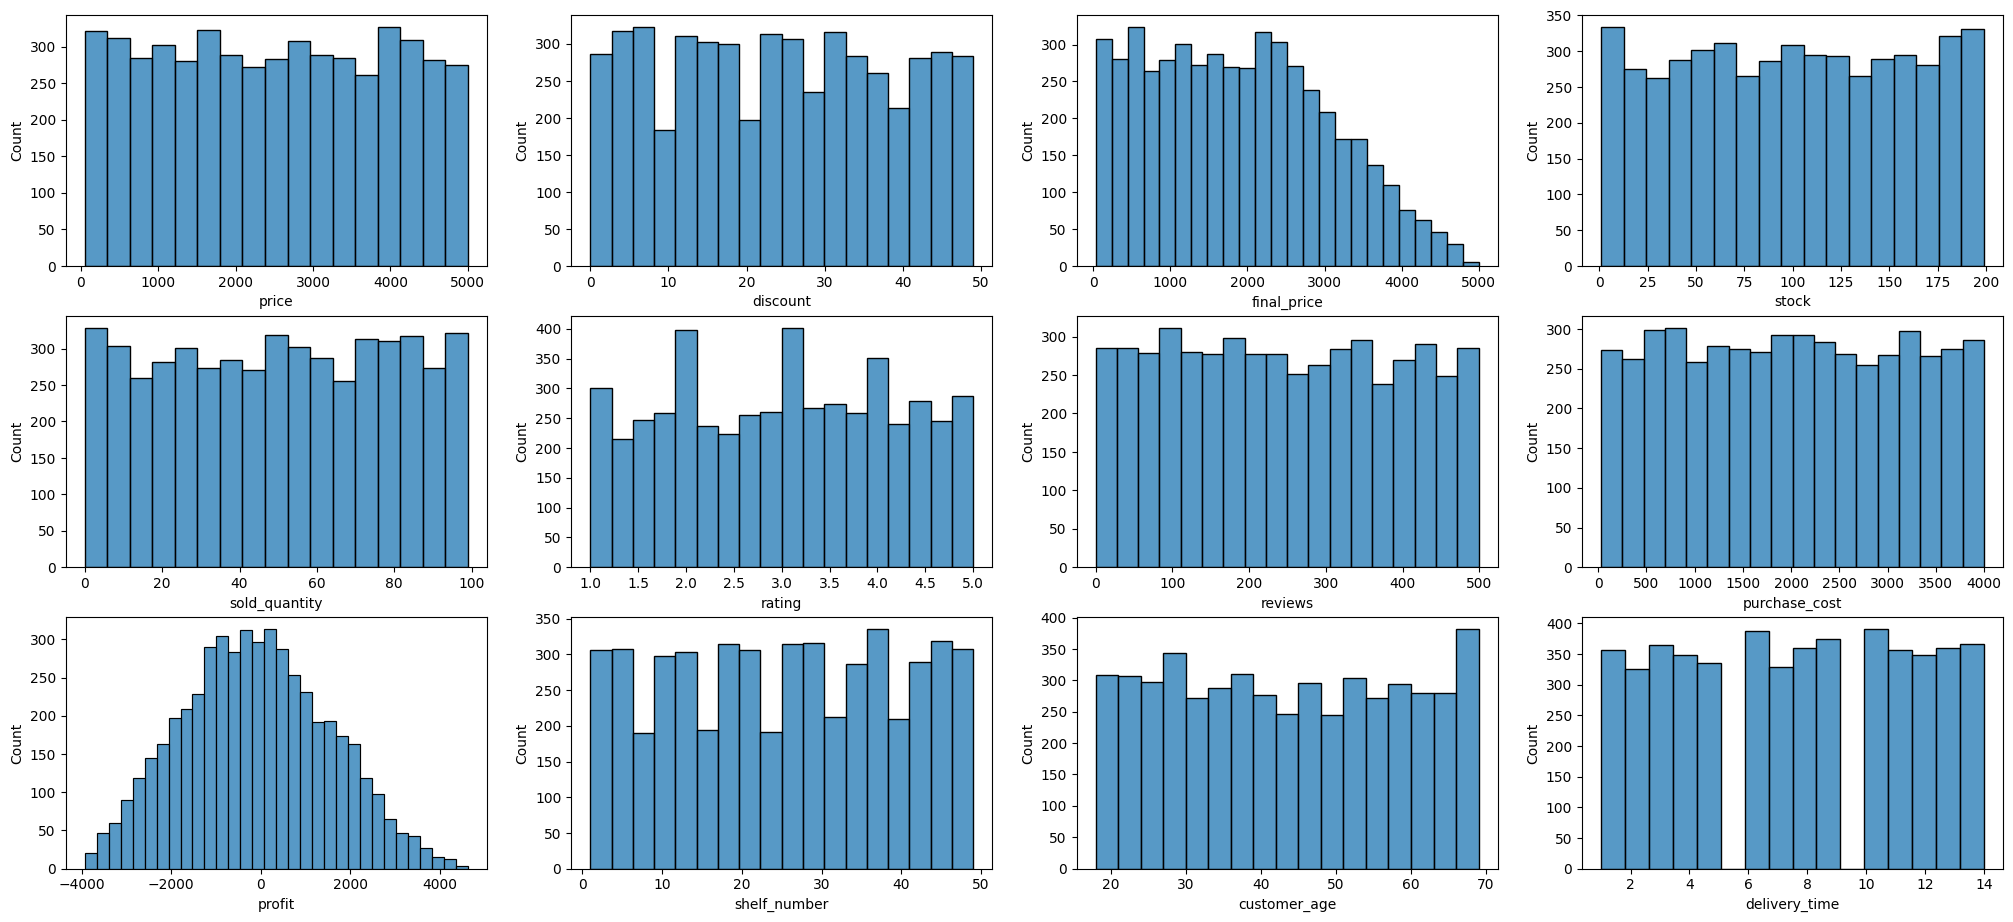

In [104]:
plt.figure(figsize=(25,15))

for index, col in enumerate(df.select_dtypes(['number']).columns):
    plt.subplot(4,4,index+1)
    sns.histplot(x= col, data=df)

La mayoria de las variables del dataset  presentan una distribucion normal a exepcion de `final_price` que representa un sesgo en cuanto a `profit` vemos una distribucion normal con beneficios y perdidas en algunos productos

## Relacion entre Variables `Numericas`

Haremos un análisis de correlación para identificar qué variables están más relacionadas entre sí y evaluar si podemos  eliminar algunas

<Axes: >

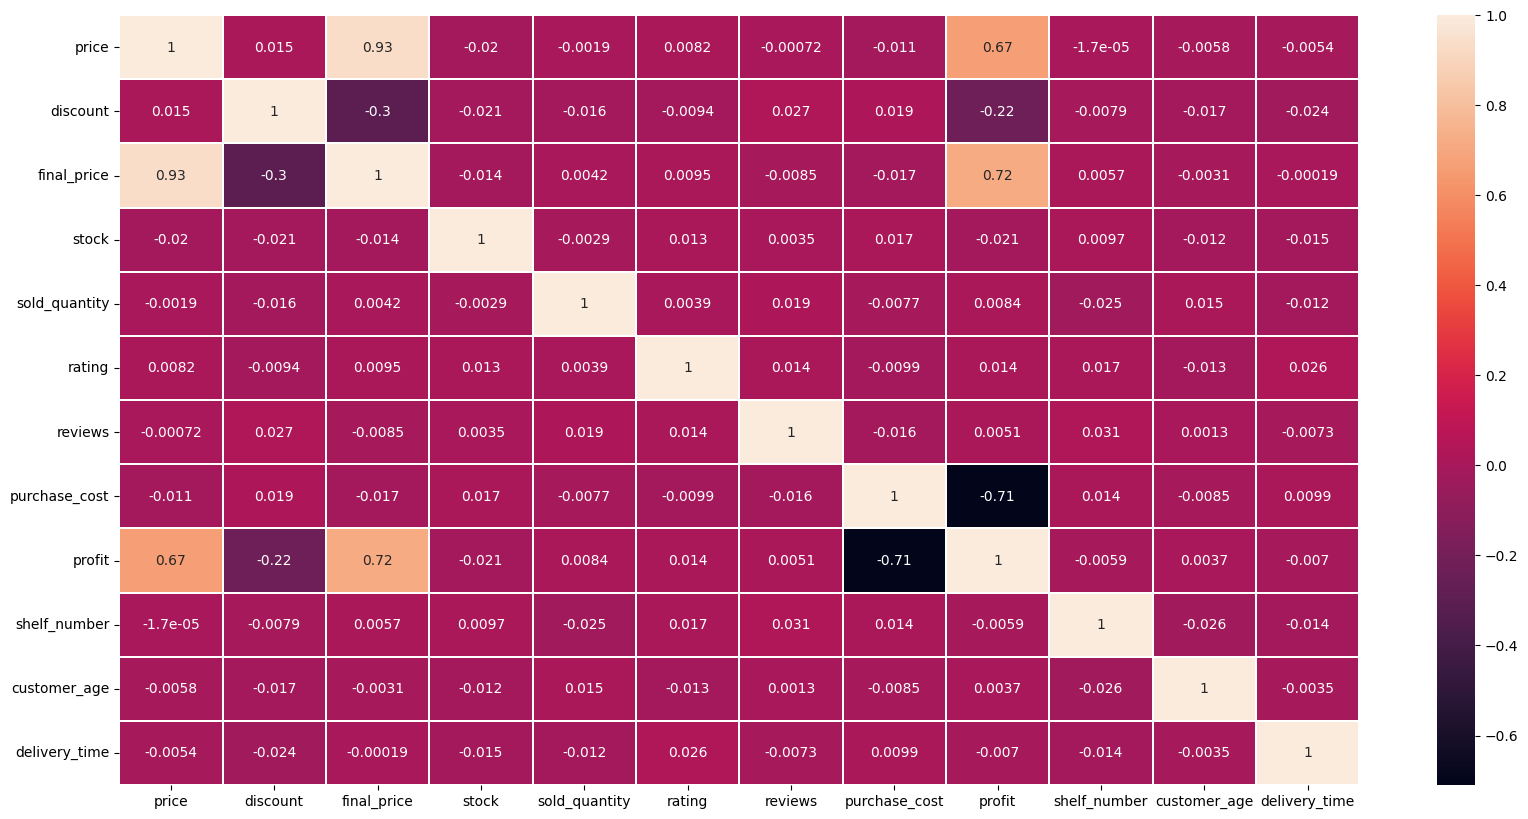

In [105]:
plt.figure(figsize=(20,10))
sns.heatmap(df.select_dtypes('number').corr(),annot=True,linewidths=0.1)

Segun nuestro heat map eliminaremos las siguientes variables:

1. `final_price`  tiene una correlacio de 0.93  con nuestra variable `price` lo que indica que estan muy relacionada 
2. `shelf_number`, `customer_age` no tienen mucha relacion entre variables asi que siento que no  debe aportamucho a nuestra prediccion


In [106]:
# Eliminamos columnas

df.drop(['final_price','shelf_number','customer_age'],axis=1,inplace=True)

## Outliers en variables `Numericas`

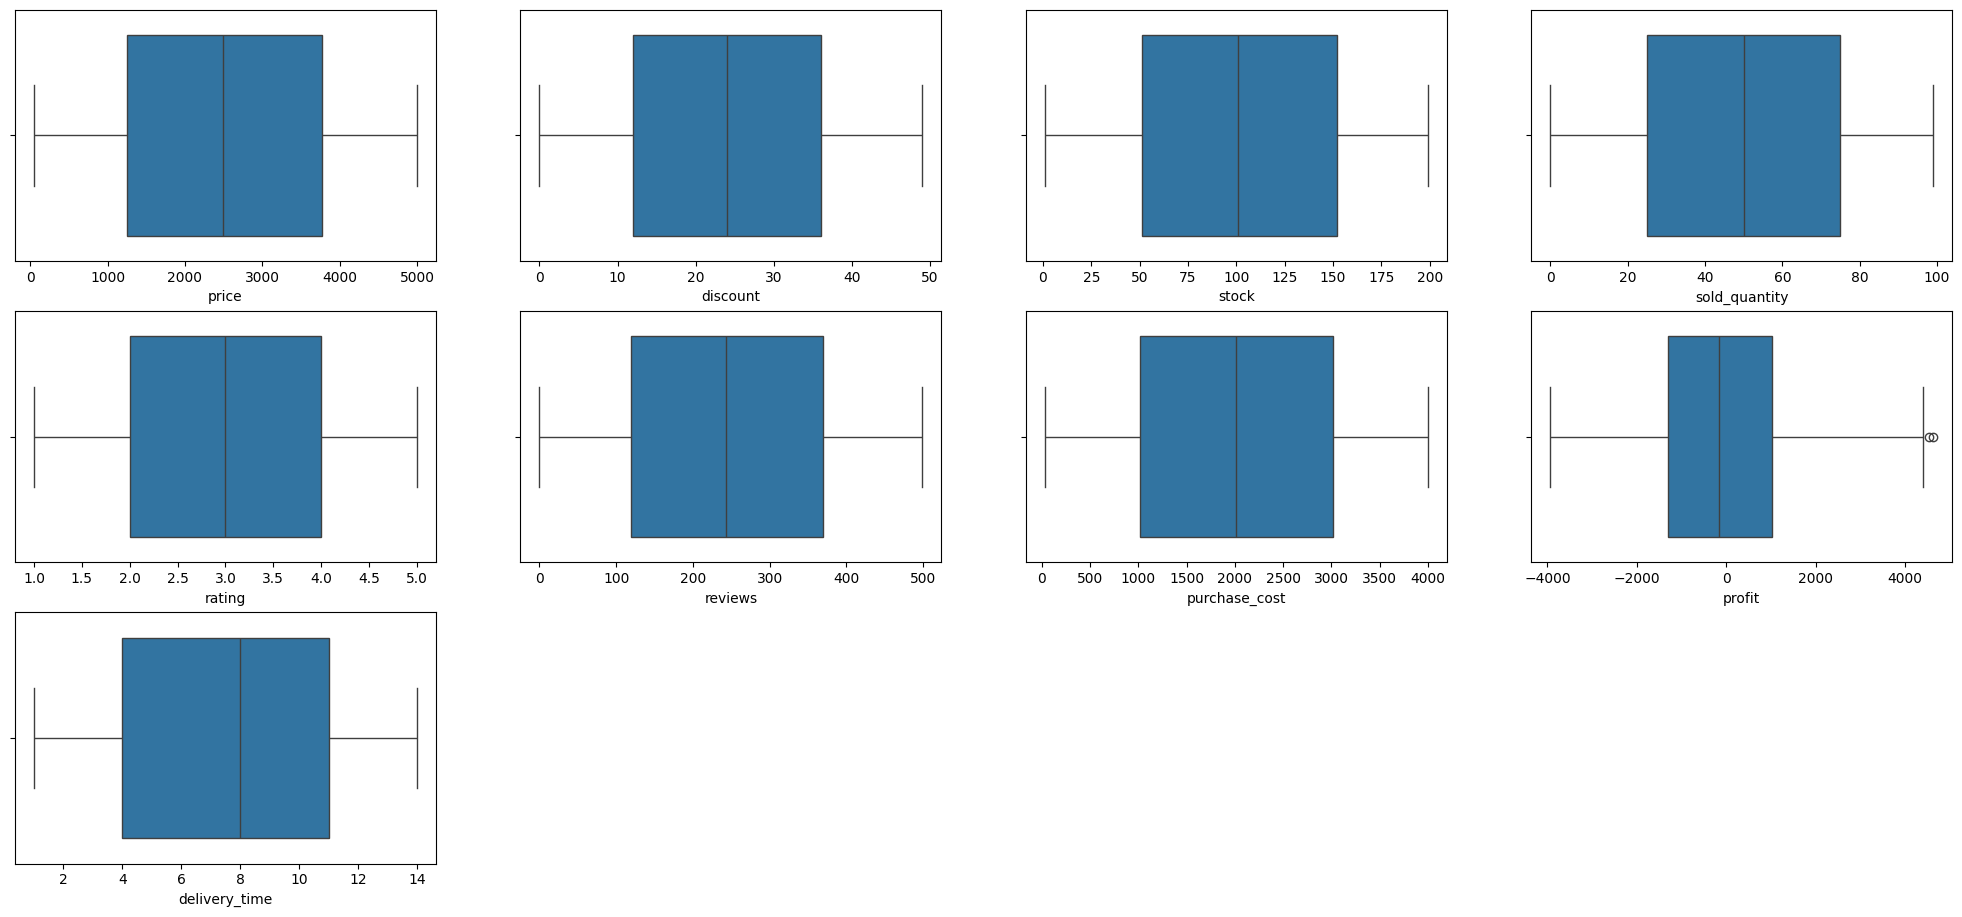

In [107]:
# Veamos outliers en nuestros valores numericos 

plt.figure(figsize=(25,15))

for index, col in enumerate(df.select_dtypes(['number']).columns):
    plt.subplot(4,4,index+1)
    sns.boxplot(x= col, data=df)

Al analizar nuestras variables numericas con boxplot nos damos cuenta de que la distribucion de los datos estan bien distribuida  sin valores extremadamente raros  a excepsion de `profit` asi que veremos cuanto representan esos valores a mi data set

In [108]:
# calculamos el peso de los outliers en nuestra data
  
valores_atipicos = df[df['profit'] > df['profit'].quantile(0.75)]

print(f'Representa un :{len(valores_atipicos)/ len(df)*100} %')

Representa un :25.0 %


el peso que representa es bastante conciderable asi que evalueremos las relaciones entre  estas variables `'price', 'discount', 'sold_quantity','purchase_cost'`

<Axes: >

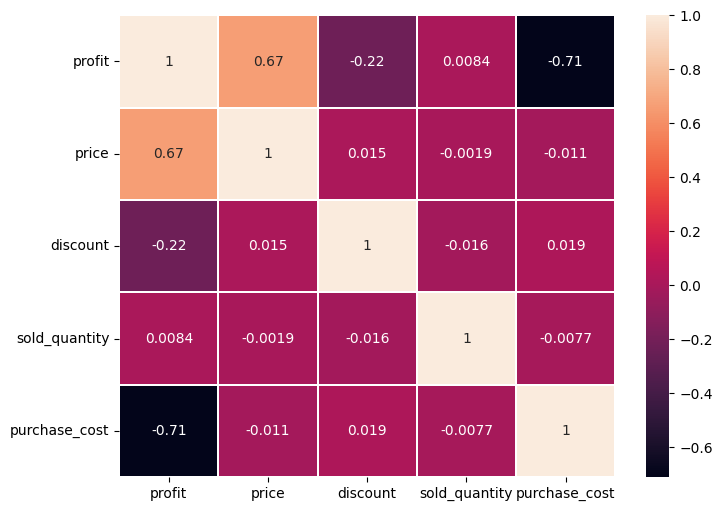

In [109]:
# Vemos  si profit esta relacionado con alguna de estas variables

corre = df[['profit', 'price', 'discount', 'sold_quantity','purchase_cost']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corre, annot=True, linewidths=0.1)

Vemos una alta relacion entre `profit` y `purchase_cost` asi que podriamos decir que los outliers en profit se deben a que existe un margen de ganancia mas alto 

## Relacion entre Variables `Categoricas`

In [110]:
categoricas = df.select_dtypes(include=['category']).columns
chi_cuadrado=pd.DataFrame(index=categoricas, columns=categoricas)

In [111]:
for var1 in categoricas:
    for var2 in categoricas:
        if var1 == var2:
            chi_cuadrado.loc[var1, var2] = 1
        else:
            tabla_contingencia = pd.crosstab(df[var1], df[var2])
            chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
            chi_cuadrado.loc[var1, var2] = p

chi_cuadrado = chi_cuadrado.astype(float)

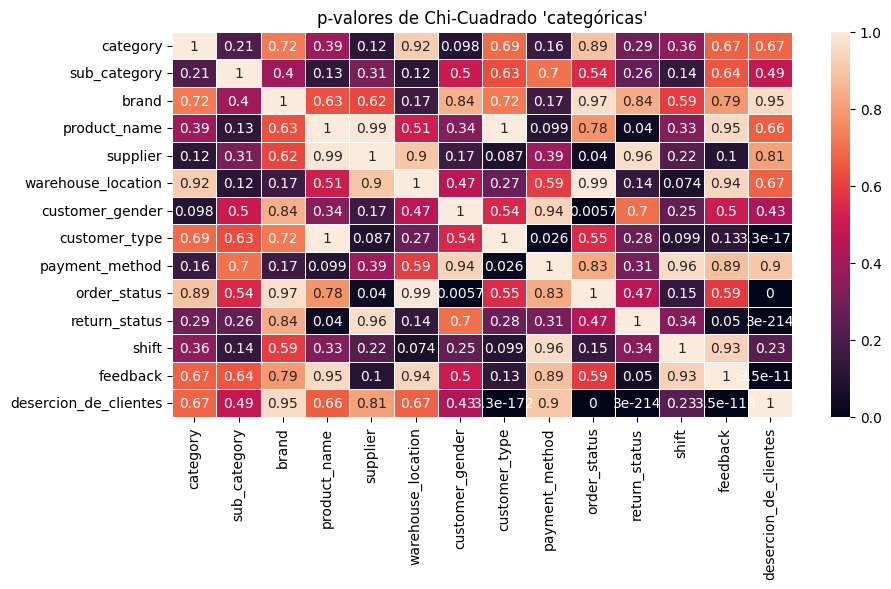

In [112]:
plt.figure(figsize=(10,5))
sns.heatmap(chi_cuadrado, annot=True, linewidths=0.5)
plt.title("p-valores de Chi-Cuadrado 'categóricas'")
plt.show()

Aqui mantendremos las columnas que solo tienen mayor relacion estadistica que son la que pueden aportar mas valor a nuestro modelo predictivo

`'product_name','return_status','supplier','order_status','customer_gender','customer_type','payment_method','feedback'`

In [113]:
df.drop(['category','sub_category','brand','warehouse_location','shift'],inplace=True, axis=1)

## Analisis de (Target)

## Distribucion

Como  ya sabemos nuestra target es categorica asi que obtaremos por hacer modelos de clasificacion 

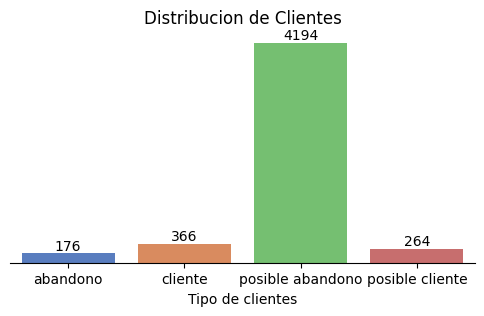

In [114]:
# Graficamos la frecruencia de nuestra columna objetivo 

plt.figure(figsize=(6,3))

distri_clientes= sns.countplot(x=df['desercion_de_clientes'],
                               hue= df['desercion_de_clientes'],
                               palette='muted')

plt.title('Distribucion de Clientes')
plt.xlabel('Tipo de clientes')
plt.ylabel('Frecuencia')


for i in distri_clientes.containers:
    distri_clientes.bar_label(i,fmt='%d')

distri_clientes.yaxis.set_visible(False)

sns.despine(top=True,left=True)

plt.show()

Aqui podemos apreciar que no existe un desbalanceo en nuestra target por lo que no necesitaremos balanceo de datos

# Guardar como csv

In [115]:
df.to_csv("super_shop_dataset_limpio_target.csv") 